<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-2-Statistics/blob/master/DS16_Unit_1_Sprint_Challenge_2_henry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
from google.colab import files

uploaded = files.upload()      ###  RUN first,  and then  Chese FILES !!!

In [37]:
#  Load data,  
# check on txt file. Found some 'unwanted string' which is '?'

colnames=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'class']

df = pd.read_csv('crx.data', names=colnames, na_values='?')
print(df.shape)
df.dtypes

(690, 16)


A1        object
A2       float64
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14      float64
A15        int64
class     object
dtype: object

In [391]:
# Checking NaN
df.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

In [370]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,120.0,0,1


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [392]:
# Replace certain character::  - as 0,  + as 1 

df=df.replace({'+': 1, '-': 0})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,120.0,0,1


In [394]:
# df.isnull().sum()
df.dtypes

A1        object
A2       float64
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9         int64
A10        int64
A11        int64
A12        int64
A13       object
A14      float64
A15        int64
class      int64
dtype: object

In [0]:
# continuous columns are: A2,3,8,11,14,15
# 1 sample t-test of class related to column A2

In [390]:
# First: Separation of  - , +  , total  for column A2

dfA2 = df['A2'].dropna()
df1A2 = df['A2'].loc[df['class']==1].dropna()
df0A2 = df['A2'].loc[df['class']==0].dropna()

# print("mean A2 for all class: ", dfA2.mean())
print("mean A2 for -class: ", df0A2.mean())
print("mean A2 for +class: ", df1A2.mean())


mean A2 for -class:  29.80823056300268
mean A2 for +class:  33.7204918032787


In [396]:
#  Check t-test   on column A2 
# Assume the hypothesis is at 95% conf. level and expected mean, mu = 30

# print("A2 for all class:  ", stats.ttest_1samp(dfA2, 30))
print("A2 for  -  class:  ", stats.ttest_1samp(df0A2, 30))
# print("A2 for  +  class:  ", stats.ttest_1samp(df1A2, 30))

A2 for  -  class:   Ttest_1sampResult(statistic=-0.3391871318424055, pvalue=0.7346601561931099)


###For mu=30 on A2, : the  "-" class :: small t-value & big p-value. >> Fail to reject the null hypothesis (mu=30) at 95% confidence level

Take another column:  A14

In [376]:
# Make sure there is no NaN
# we compare + & - on column A14

dfA14 = df['A14'].dropna()
df1A14 = df['A14'].loc[df['class']==1].dropna()
df0A14 = df['A14'].loc[df['class']==0].dropna()

# print(dfA14.mean())
print(df0A14.mean())
print(df1A14.mean())
print()
print("#samples A14 on +: " ,len(df1A14))
print("#samples A14 on -: " ,len(df0A14))

199.6994680851064
164.421926910299

#samples A14 on +:  301
#samples A14 on -:  376


In [397]:
#  Check t-test  for class= +  on column A8  with expected mean 180

# print("A8 for all class:  ", stats.ttest_1samp(dfA14, 180))
# print("A14 for  -  class:  ", stats.ttest_1samp(df0A14, 180))
print("A14 for  +  class:  ", stats.ttest_1samp(df1A14, 180))

A14 for  +  class:   Ttest_1sampResult(statistic=-1.6706950525765791, pvalue=0.09582478970123821)


###For mu=30 on A14, : the  "+" class has the best result: smaller t-value & big p-value. >> Class"+" Fail to reject the null hypothesis at 95% level

###**Chi^2  for "A6" & "class" **

In [0]:
#Chi2: (Chi-square value, p-value ,DOF)

from scipy.stats import chisquare  # One-way chi square test
from scipy.stats import normaltest

In [363]:
#  crosstab: between some columns against "class"

observed = pd.crosstab(df['class'], df['A6'])
observed

observed_all = pd.crosstab(df['class'], df['A6'], margins=True)
observed_all

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
class,,,,,,,,,,,,,,,
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6,378
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32,303
All,54,137,41,30,25,53,59,10,51,38,78,3,64,38,681


In [0]:
# expected value ff = 1: 
# 53 * 303 /681

In [0]:
# expected value aa = 0: 
# 54*378/681

In [356]:
# Summarise column & rows:
row_all = observed_all.iloc[0:2, 14:].values
row_all = row_all.T[0]
row_all

array([378, 303])

In [357]:
col_all = observed_all.iloc[2:, 0:14].values
col_all = col_all[0]
col_all

array([ 54, 137,  41,  30,  25,  53,  59,  10,  51,  38,  78,   3,  64,
        38])

In [358]:
total_all = df.shape[0]
total_all

690

In [385]:
expected = []
for i in range(len(row_all)):
  expected_row = []
  for column in col_all:
    expected_val = column*row_all[i]/total_all
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print()
print(expected)

(2, 14)

[[29.5826087  75.05217391 22.46086957 16.43478261 13.69565217 29.03478261
  32.32173913  5.47826087 27.93913043 20.8173913  42.73043478  1.64347826
  35.06086957 20.8173913 ]
 [23.71304348 60.16086957 18.00434783 13.17391304 10.97826087 23.27391304
  25.90869565  4.39130435 22.39565217 16.68695652 34.25217391  1.3173913
  28.10434783 16.68695652]]


In [386]:
chi2 = ((observed - expected)**2/expected).sum().sum()
chi2

99.742046758806

###**Chi2 value for the above test : 99.742**

###**Using contingency table**

In [368]:
# pass in our observed value table (contingency table)
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistic 98.32520342679135

 p-value 3.4999300402715717e-15

 degrees of freedom 13

 expected frequencies table: 
 [[29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  35.52422907 21.09251101]
 [24.02643172 60.95594714 18.24229075 13.34801762 11.12334802 23.5814978
  26.25110132  4.44933921 22.69162996 16.90748899 34.70484581  1.33480176
  28.47577093 16.90748899]]


###**Chi2 result of contingency table is  slightly different than of manual calculation.  But both calculation show pvalue < 0.05.  We reject the null hypothesis that the data of 'A8' and 'class' are independent **

### **Checking Two sample T-test.  **
I chose column A8,  Confidence Level: 95%

In [197]:
stats.ttest_ind(df1A8, df0A8)

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

###Based on the big# of t-test and  extreem small of pvalue, we reject the null hypothesis that the + has more value on -  about column A8.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. I dont see relationship between continuous columns:  A2 & A14  
2. Chi2 result of contingency table is slightly different than using manual calculation. But both calculation show pvalue < 0.05.  
3. Challenging part: to compare 2 columns against each other & make conclusion. It's all relative

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Main difference: how probability is used  
* Frequentists use probability only to model/generalize the "sampling.  
* Bayesians probability changes as new evidence shows up. And that probability is used more to model a new sampling. This "resampling" with new probability is recurring until probability > 95%

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.

In [0]:
# Answer to Strech Goal Part 3:
# column:  A2+


def confidence_interval(data, confidence=0.95):
 
  data = np.array(df1A2)
  x_bar = np.mean(df1A2)
  n = len(df1A2)
  s = np.std(df1A2, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

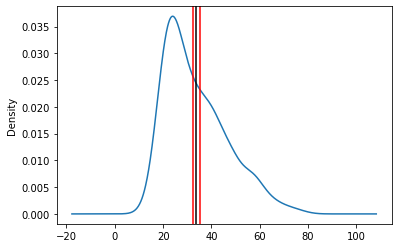

In [414]:
lower, mean, upper = confidence_interval(df1A2)

df1A2.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()


In [0]:
# Answer to Strech Goal Part 3:
# column:  A2-


def confidence_interval(data, confidence=0.95):
 
  data = np.array(df0A2)
  x_bar = np.mean(df0A2)
  n = len(df0A2)
  s = np.std(df0A2, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

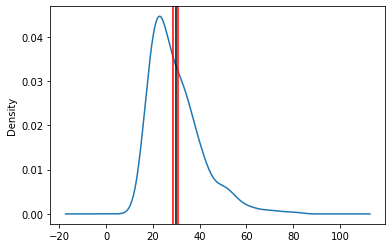

In [416]:
lower, mean, upper = confidence_interval(df0A2)

df0A2.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()


In [420]:
# Mean for - & +  on A2
print(df0A2.mean(), df1A2.mean() )

29.80823056300268 33.7204918032787
